## Clustering

* [Clustering](https://www.google.com/search?ei=qFCTXO-xHsbW6ASS7ovYBg&q=clustering+sklearn&oq=clustering+s&gs_l=psy-ab.1.0.0l10.3142.4177..5541...0.0..0.177.402.1j2......0....1..gws-wiz.......0i71.mJI4VlIVpx4) sklearn documentation
* K-means clustering: [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) 
    * `n_clusters=8` assign the number of clusters 
    * `max_iter=300` the number of iterations
    * `n_init=10` the number of different initializations, you can end up with different clusetrings, you want to repreat the algo 

In [45]:
import numpy as np
import pandas as pd
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])

In [3]:
X[:, 0]

array([ 1,  1,  1, 10, 10, 10])

In [4]:
X[:, 1]

array([2, 4, 0, 2, 4, 0])

In [5]:
# create the classifier
kmeans = KMeans(n_clusters=2, random_state=0)
# fit the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
# see the labels
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [7]:
# make predictions
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [8]:
# Coordinates of cluster centers.
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

## Clustering on Enron Finance Data

### Apply k-means clustering to our Enron financial data. 

Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

### #1 Read in the email + financial (E+F) dataset

* start with performing k-means based on just two financial features 

In [ ]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features


In [10]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [11]:
# load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../5_datasets_and_questions/final_project_dataset_unix.pkl", "rb") )
# remove the outlier 
data_dict.pop("TOTAL", 0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [12]:
# the input features we want to use 
# can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
# process data foe sklearn
data = featureFormat(data_dict, features_list )
# split target from finance features
poi, finance_features = targetFeatureSplit( data )

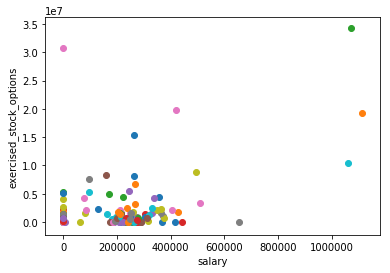

In [13]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()

### #2 What features will your clustering algorithm use:

* `salary` and `exercised_stock_options`

### #3 Deploying Clustering

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. 

In [14]:
def ml_cluster(finance_features):
    # create the classifier
    kmeans = KMeans(n_clusters=2)
    # train the classifier
    kmeans.fit(finance_features)
    
    return kmeans

In [15]:
# train the classifier
kmeans = ml_cluster(finance_features) 

### #4 Make Predictions for the labels

In [16]:
pred = kmeans.predict(finance_features)

### #5 Visualize the classes

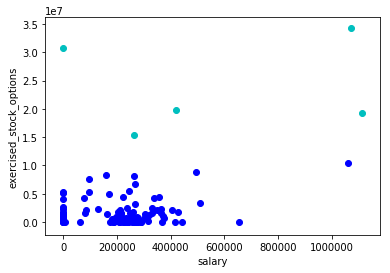

In [17]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

### #6 In the scatterplot that pops up, are the clusters what you expected?

No, but it makes sense.

### #7 Clustering with 3 features

Add a third feature to features_list, `total_payments`

In [72]:
# add the third feature
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
# process data foe sklearn
data = featureFormat(data_dict, features_list )
# split target from finance features
poi, finance_features = targetFeatureSplit( data )

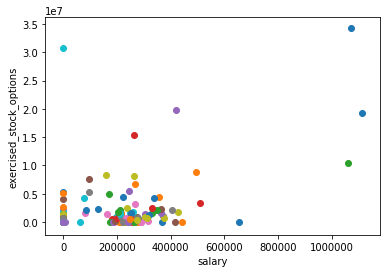

In [75]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()

In [77]:
# train the classifier with the three features
kmeans = ml_cluster(finance_features) 
# make predictions
pred = kmeans.predict(finance_features)

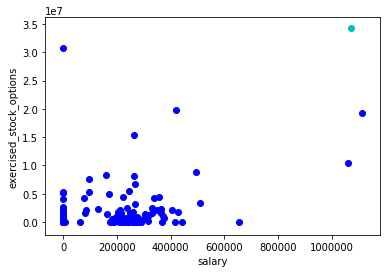

In [78]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

We can see that 4 points switch clusters

### #8 What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

In [117]:
# test the new file
enron_df = pd.read_csv('../5_datasets_and_questions/final_project_datase.csv')
enron_df.head()

,name,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
0,ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,...,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN
1,BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,...,NaN,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,...,39.0,4046157.0,29.0,864523.0,0.0,False,NaN,465.0,1757552.0,NaN
3,BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,...,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
4,BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,...,NaN,NaN,NaN,69.0,NaN,False,NaN,NaN,145796.0,NaN


In [123]:
# maximum
enron_df[['name', 'exercised_stock_options']].sort_values(by="exercised_stock_options", ascending=False).iloc[:2]

,name,exercised_stock_options
130,TOTAL,311764000.0
79,LAY KENNETH L,34348384.0


In [125]:
# minimum
enron_df[['name', 'exercised_stock_options']].sort_values(by="exercised_stock_options", ascending=True).iloc[:1]

,name,exercised_stock_options
8,BELFER ROBERT,3285.0


### #9 What are the maximum and minimum values taken by “salary”?

In [128]:
# maximum
enron_df[['name', 'salary']].sort_values(by="salary", ascending=False).iloc[:4]

,name,salary
130,TOTAL,26704229.0
122,SKILLING JEFFREY K,1111258.0
79,LAY KENNETH L,1072321.0
47,FREVERT MARK A,1060932.0


In [127]:
# minimum
enron_df[['name', 'salary']].sort_values(by="salary", ascending=True).iloc[:1]

,name,salary
2,BANNANTINE JAMES M,477.0


## Feature Rescaling 

Apply feature scaling on the `salary` and `exercised_stock_options` 

In [19]:
# create the scaler
scaler = MinMaxScaler()
# rescale the weights
rescaled_finance_features = scaler.fit_transform(finance_features)

### #1 Train the classifier with the rescaled weight

In [20]:
# train the classifier
kmeans = ml_cluster(rescaled_finance_features) 

### #2 Make Predictions with the classifier trained with the rescaled features

In [21]:
pred = kmeans.predict(rescaled_finance_features)

### #3 View the clusters with the rescaled finance features 

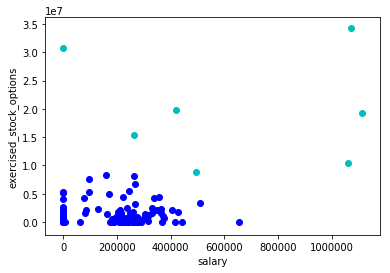

In [22]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

 What would be the rescaled value of a "salary" feature that had an original value of `$200,000`, and an "exercised_stock_options" feature of `$1 million`?

In [56]:
# transform 200,000 and 1,000,000 
scaler.transform([[200000., 1000000.]])

array([[0.17997621, 0.02911345]])

### #4 What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?

Critical, emails typically number in the hundreds or low thousands, salaries are usually at least 1000x higher.